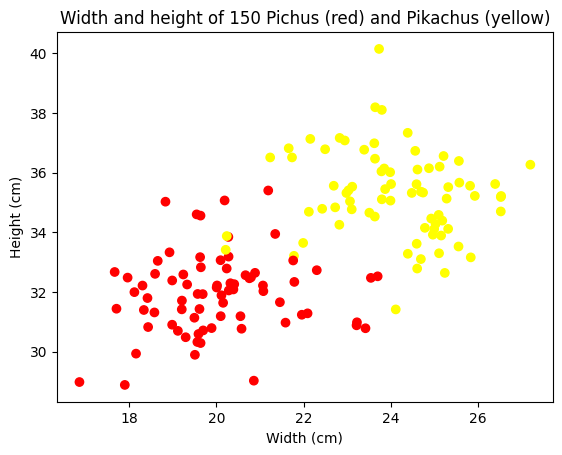

In [46]:
import csv
import matplotlib.pyplot as plt

# Create a list to store the observations or rows as dictionaries from the datapoints.txt file
observations = []

with open('data\\datapoints.txt') as data_file:
    r = csv.DictReader(data_file)

    # Append each observation as dictionaries and map the column names to the keys
    # There is a third comma in the file inside the column names wich creates a fourth column, 
    # that column is empty and can be ignored. The label values are correctly placed in the third column.
    for obs in r:
        observations.append({'width': float(obs['(width (cm)'].strip()), 
                             'height': float(obs[' height (cm)'].strip()), 
                             'label': int(obs[' label (0-pichu'].strip())})


# Create lists for the x and y variables to be used in the plot. x is width and y height.
# Create a list for the colors to be used for each observation based on the label.
x = [obs['width'] for obs in observations]
y = [obs['height'] for obs in observations]
colors = ['yellow' if obs['label'] == 1 else 'red' for obs in observations]

# Plot the observations
plt.title('Width and height of 150 Pichus (red) and Pikachus (yellow)')
plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.scatter(x, y, c=colors)
